In [2]:
import folium
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

Ler arquivos

In [14]:
londrina = geopandas.read_file('shapefile/bairros/LIM_Bairros_V1.shp')
lojas = pd.read_csv('Dados/coordenadas.csv')

In [17]:
lojas

,Unnamed: 0,Classificação,Latitude,Longitude,Nome
0,0,26,-23.299955,-51.184416,Espaço Smart
1,1,235,-23.353330,-51.137791,Depósito Roseira - Construção e Acabamentos
2,2,317,-23.301205,-51.169041,Depósito São Marcos
3,3,150,-23.258204,-51.144291,Depósito Alvorada - Materiais de Construção
4,4,12,-23.344830,-51.188916,Gol Materiais Para Construção
...,...,...,...,...,...
201,201,11,-23.279955,-51.172666,Madeireira Casa Verde
202,202,11,0.000000,0.000000,Madeireira Casa Verde
203,203,3,-23.345080,-51.166666,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re..."
204,204,3,0.000000,0.000000,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re..."


In [16]:

lojas['Classificação'] = lojas['Classificação'].str.strip('()')
lojas.sort_values('Classificação',ascending=False)



,Unnamed: 0,Classificação,Latitude,Longitude,Nome
48,48,91,-23.260205,-51.165166,Depósito Betel - Materiais de Construção e Mad...
68,68,90,-23.304330,-51.198541,DEPÓSITO BANDEIRANTES
105,105,90,-23.304705,-51.161291,Diviplus Acabamentos
106,106,90,0.000000,0.000000,Diviplus Acabamentos
182,182,9,0.000000,0.000000,Mercadão das Tintas
...,...,...,...,...,...
148,148,NaN,-23.300580,-51.182541,J Brito Madeiras
152,152,NaN,-23.294580,-51.159666,Serralheria Tietê
153,153,NaN,-23.302580,-51.171791,Serralheria Portaco
155,155,NaN,-23.304080,-51.168916,Telhacor Tintas


Transformar dados

In [18]:
lista = []
listaNomes = []
listaClassifica = []
lojas['Classificação'] = lojas['Classificação'].str.strip('()')
lojas2 = pd.DataFrame([], columns = ['Nome', 'Classificação'])

for index, loja in lojas.iterrows():
    if loja['Longitude'] == 0.00000 or loja['Longitude'] < -51.35:
        #lista.append(Point(0,0))
        continue
    listaNomes.append(loja['Nome'])
    #valor = loja['Classificação'].replace('(', '')
    #print(valor)
    #valor = valor.replace(')', '')
    listaClassifica.append(float(loja['Classificação']))
    lista.append(Point(loja['Longitude'],loja['Latitude']))
    
lojas2['Nome'] = pd.Series(listaNomes)
lojas2['Classificação'] = pd.Series(listaClassifica)
lojas2['Classificação'].fillna(0, inplace=True)
plista = pd.DataFrame(lista)
glista = geopandas.GeoSeries(lista)
lojasLondrina = geopandas.GeoDataFrame(lojas2, geometry=glista)

In [20]:
lojasLondrina.sort_values('Classificação',ascending=False)

,Nome,Classificação,geometry
18,Telhanorte Tiradentes,847.0,POINT (-51.20242 -23.29621)
11,Todimo,725.0,POINT (-51.18479 -23.30045)
6,Leroy Merlin Londrina,410.0,POINT (-51.14354 -23.31245)
2,Depósito São Marcos,317.0,POINT (-51.16904 -23.30120)
174,Macripar Parafusos & Ferramentas,299.0,POINT (-51.17017 -23.30333)
...,...,...,...
138,Serralheria Portaco,0.0,POINT (-51.17179 -23.30258)
140,Telhacor Tintas,0.0,POINT (-51.16892 -23.30408)
104,Forte Acessórios Industriais - Filial Londrina,0.0,POINT (-51.15742 -23.31471)
118,Mundial Tintas,0.0,POINT (-51.16254 -23.30170)


In [44]:
len(listaClassifica)

187

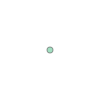

In [45]:
glista[1]

In [69]:
def Nmaxelements(nome,classifica,list1,listPoints, N): 
    final_list = pd.DataFrame([], columns = ['Nome', 'Classificação'])
    listaPointsF = []
    classificacao = []
    nomes = []
    pontos = []
    index = 0
    for i in range(0, N):  
        max1 = 0
        index = 0
        for i, j in enumerate(classifica):
            
            if j > max1: 
                max1 = j
                index = i
        #print(index)
        
        classificacao.append(classifica[index])
        nomes.append(nome[index])
        pontos.append(listPoints[index])
        classifica[index] = 0
        #final_list.append(list1.iloc[index]) 
        #list1 = list1.drop(index,axis=0)
        
        #listaPointsF.append(listPoints[index])
        
    final_list['Nome'] = pd.Series(nomes)
    final_list['Classificação'] = pd.Series(classificacao)
    print(len(final_list))
    print(len(pontos))
    return geopandas.GeoDataFrame(final_list, geometry=pontos) 

In [70]:
retailMx = Nmaxelements(nome=listaNomes,classifica=listaClassifica,list1=lojas2,listPoints=glista, N=20)

20
20


In [64]:
retailMx.drop(2,axis=0)
retailMx['Classificação'][6]

38.0

In [71]:
retailMx

,Nome,Classificação,geometry
0,Telhanorte Tiradentes,847.0,POINT (-51.20242 -23.29621)
1,Todimo,725.0,POINT (-51.18479 -23.30045)
2,Leroy Merlin Londrina,410.0,POINT (-51.14354 -23.31245)
3,Depósito São Marcos,317.0,POINT (-51.16904 -23.30120)
4,Macripar Parafusos & Ferramentas,299.0,POINT (-51.17017 -23.30333)
5,DEPÓSITO ROMANI,280.0,POINT (-51.15104 -23.35758)
6,DEPÓSITO ROMANI,280.0,POINT (-51.15104 -23.35758)
7,Todimo,274.0,POINT (-51.16342 -23.25808)
8,Depósito Roseira - Construção e Acabamentos,235.0,POINT (-51.13779 -23.35333)
9,Depósito Roseira - Construção e Acabamentos,235.0,POINT (-51.13779 -23.35333)


In [84]:
for i, x in retailMx.iterrows():
    print(x)

Nome                     Telhanorte Tiradentes
Classificação                              847
geometry         POINT (-51.202416 -23.296205)
Name: 0, dtype: object
Nome                                    Todimo
Classificação                              725
geometry         POINT (-51.184791 -23.300455)
Name: 1, dtype: object
Nome                     Leroy Merlin Londrina
Classificação                              410
geometry         POINT (-51.143541 -23.312455)
Name: 2, dtype: object
Nome                       Depósito São Marcos
Classificação                              317
geometry         POINT (-51.169041 -23.301205)
Name: 3, dtype: object
Nome                 Macripar Parafusos & Ferramentas
Classificação                                     299
geometry         POINT (-51.17016599999999 -23.30333)
Name: 4, dtype: object
Nome                          DEPÓSITO ROMANI
Classificação                             280
geometry         POINT (-51.151041 -23.35758)
Name: 5, dtype: objec

In [ ]:
from geopandas import GeoDataFrame
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#gdf = GeoDataFrame(glista, crs= {"init": "epsg:3857"}) # Create a georeferenced dataframe  
#gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
retailMx.crs = {'init' :'epsg:4326'}
df = retailMx.to_crs(epsg=3857)
#ax = df.plot(figsize=(20, 20), legend=True,alpha=1.0,markersize=retailMx['Classificação'])
ax = df.plot(figsize=(20, 20),legend=True,markersize=retailMx['Classificação'],column = retailMx['Classificação'], scheme='quantiles', cmap='copper')
#for x, y, label in zip(retailMx.geometry.x, retailMx.geometry.y, retailMx.Nome):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

#for i, place in retailMx.iterrows():
#    plt.text(place.geometry.x + 300, place.geometry.y, place.Nome,  bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')) # 300m x offset added.
#for idx, row in retailMx.iterrows():
#    plt.annotate(s=row.Nome, xy=(row.geometry.x,row.geometry.y),
#                 horizontalalignment='center')
# choose any of the supported maps from ctx.sources
for x, y, label in zip(df.geometry.x, df.geometry.y, df.Nome):
    #ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    ax.text(x, y+300, label, ha="center", va="center", 
            size=10,
            bbox=bbox_props)
ctx.add_basemap(ax,url=ctx.sources.ST_TONER_BACKGROUND)
ax.set_axis_off()
plt.savefig('teste.png')
plt.show()

In [ ]:
retailMx.

/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-119-d316e6151fe3>:26: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite)


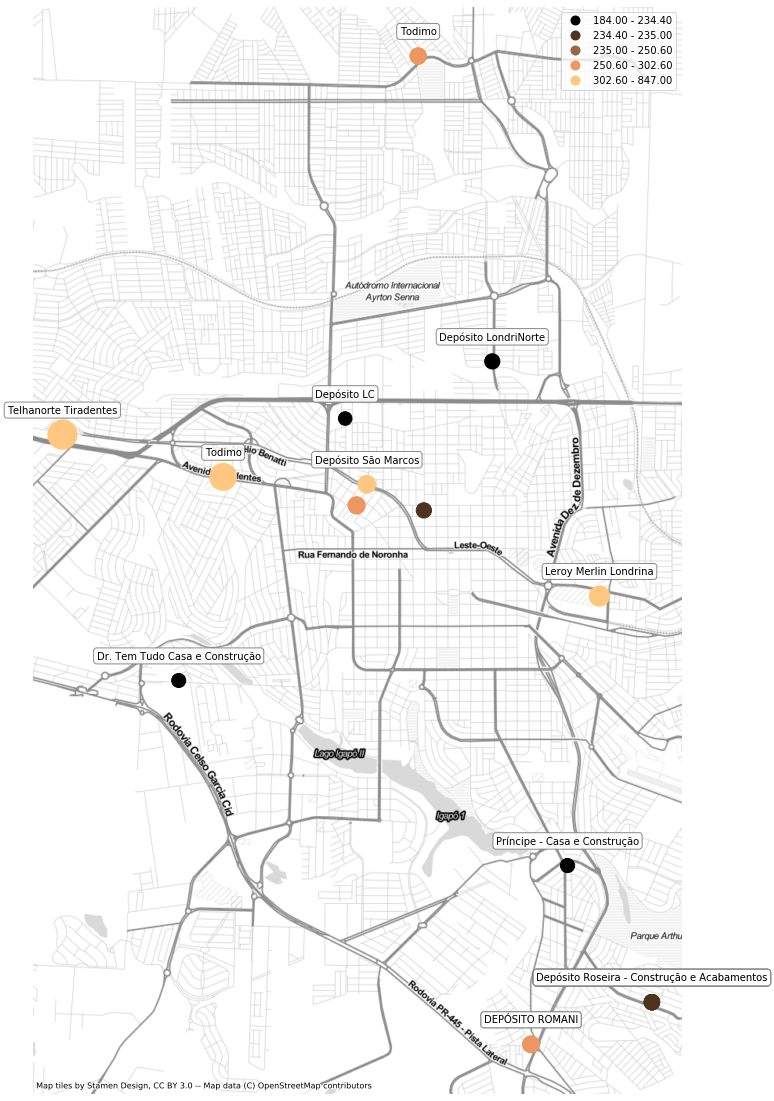

In [119]:
from geopandas import GeoDataFrame
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

#gdf = GeoDataFrame(glista, crs= {"init": "epsg:3857"}) # Create a georeferenced dataframe  
#gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
retailMx.crs = {'init' :'epsg:4326'}
df = retailMx.to_crs(epsg=3857)
#ax = df.plot(figsize=(20, 20), legend=True,alpha=1.0,markersize=retailMx['Classificação'])
ax = df.plot(figsize=(20, 20),legend=True,markersize=retailMx['Classificação'],column = retailMx['Classificação'], scheme='quantiles', cmap='copper')
#for x, y, label in zip(retailMx.geometry.x, retailMx.geometry.y, retailMx.Nome):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

#for i, place in retailMx.iterrows():
#    plt.text(place.geometry.x + 300, place.geometry.y, place.Nome,  bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')) # 300m x offset added.
#for idx, row in retailMx.iterrows():
#    plt.annotate(s=row.Nome, xy=(row.geometry.x,row.geometry.y),
#                 horizontalalignment='center')
# choose any of the supported maps from ctx.sources
for x, y, label in zip(df.geometry.x, df.geometry.y, df.Nome):
    #ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    if label == 'Macripar Parafusos & Ferramentas' or label == 'ROPEL MÁQUINAS E FERRAMENTAS':
        continue
    ax.text(x, y+300, label, ha="center", va="center", 
            size=10,
            bbox=bbox_props)
ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.savefig('teste.png')
plt.show()

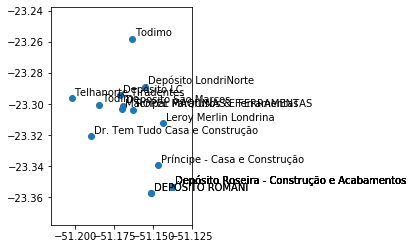

In [103]:
cities = retailMx
ax = cities.plot()

for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.Nome):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [5]:
lojasLondrina

,Nome,Classificação,geometry
0,Espaço Smart,(26),POINT (-51.18442 -23.29995)
1,Depósito Roseira - Construção e Acabamentos,(235),POINT (-51.13779 -23.35333)
2,Depósito São Marcos,(317),POINT (-51.16904 -23.30120)
3,Depósito Alvorada - Materiais de Construção,(150),POINT (-51.14429 -23.25820)
4,Gol Materiais Para Construção,(12),POINT (-51.18892 -23.34483)
...,...,...,...
182,Z Casa & Cozinha,(19),POINT (-51.16042 -23.30908)
183,Mega Andaimes,(10),POINT (-51.16292 -23.30058)
184,Madeireira Casa Verde,(11),POINT (-51.17267 -23.27995)
185,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",(3),POINT (-51.16667 -23.34508)


Limpar dados

In [66]:
lojas['Classificação'] = lojas['Classificação'].str.strip('()')
#map(float, lojas['Classificação'])
lojas['Classificação'].fillna(0, inplace=True)
list_of_floats = []

for item in lojas['Classificação'] :
    list_of_floats.append(float(item))

In [67]:
lojas2 = pd.DataFrame([], columns = ['Nome', 'Classificação'])
lojas2['Nome'] = pd.Series(lojas['Nome'])
lojas2['Classificação'] = pd.Series(list_of_floats)

In [81]:
lojas2

,Nome,Classificação
0,Espaço Smart,26.0
1,Depósito Roseira - Construção e Acabamentos,235.0
2,Depósito São Marcos,317.0
3,Depósito Alvorada - Materiais de Construção,150.0
4,Gol Materiais Para Construção,12.0
...,...,...
182,Z Casa & Cozinha,9.0
183,Mega Andaimes,1.0
184,Madeireira Casa Verde,32.0
185,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",6.0


In [72]:
lojas3 = lojas2
glista2 = glista
for i in range(0,len(glista2)):
    if glista2.iloc[i].x == 0.0:
        lojas3.drop([i],inplace=True)
        glista2.drop([i],inplace=True)
lojas3

IndexError: single positional indexer is out-of-bounds

In [46]:
lojas2.drop([2])

,Nome,Classificação,geometry
0,Espaço Smart,26.0,POINT (-51.18442 -23.29995)
1,Depósito Roseira - Construção e Acabamentos,235.0,POINT (-51.13779 -23.35333)
3,Depósito Alvorada - Materiais de Construção,150.0,POINT (-51.14429 -23.25820)
4,Gol Materiais Para Construção,12.0,POINT (-51.18892 -23.34483)
5,Depósito de Materiais Casa & Construção,6.0,POINT (-51.16404 -23.35145)
...,...,...,...
201,Madeireira Casa Verde,11.0,POINT (-51.17267 -23.27995)
202,Madeireira Casa Verde,11.0,POINT (0.00000 0.00000)
203,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",3.0,POINT (-51.16667 -23.34508)
204,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",3.0,POINT (0.00000 0.00000)


In [29]:
lojasLondrina = geopandas.GeoDataFrame(lojas2)